# **Vector Autoregression**

Vector AutoRegressive (VAR) is a multivariate forecasting algorithm that is used when two or more time series influence each other.

VAR is a bidirectional model.

In a bidirectional model, variables influence each other.

The VAR (1) model with two time series (Y1 and Y2):

**Ŷ`1,t` = μ`1` + ϕ`11`Y`1,t-1` + ϕ`12`Y`1,t-2` + ɛ`1,t`**

**Ŷ`2,t` = μ`2` + ϕ`21`Y`2,t-1` + ϕ`22`Y`2,t-2` + ɛ`2,t`**

#Dataset 1: FB.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Time Series Analysis/Dow_Jones_Industrial_Average.csv', parse_dates= True)

In [ ]:
df = df[(df['Date'] > '2016-01-14') & (df['Date'] <= '2017-01-30')]

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000
2,2016-01-19,16009.450195,16171.959961,15900.250000,16016.019531,16016.019531,144360000
3,2016-01-20,15989.450195,15989.450195,15450.559570,15766.740234,15766.740234,191870000
4,2016-01-21,15768.870117,16038.589844,15704.660156,15882.679688,15882.679688,145140000
5,2016-01-22,15921.099609,16136.790039,15921.099609,16093.509766,16093.509766,145850000
6,2016-01-25,16086.459961,16086.459961,15880.150391,15885.219727,15885.219727,123250000
7,2016-01-26,15893.160156,16185.790039,15893.160156,16167.230469,16167.230469,118210000
8,2016-01-27,16168.740234,16235.030273,15878.299805,15944.459961,15944.459961,138350000
9,2016-01-28,15960.280273,16102.139648,15863.719727,16069.639648,16069.639648,130120000
10,2016-01-29,16090.259766,16466.300781,16090.259766,16466.300781,16466.300781,217940000


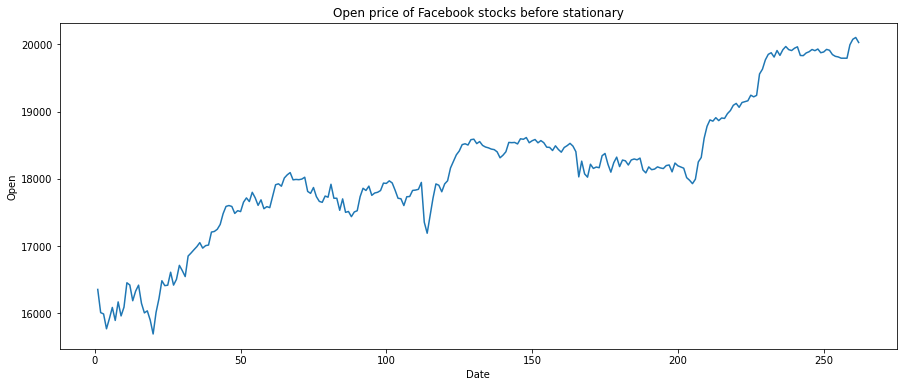

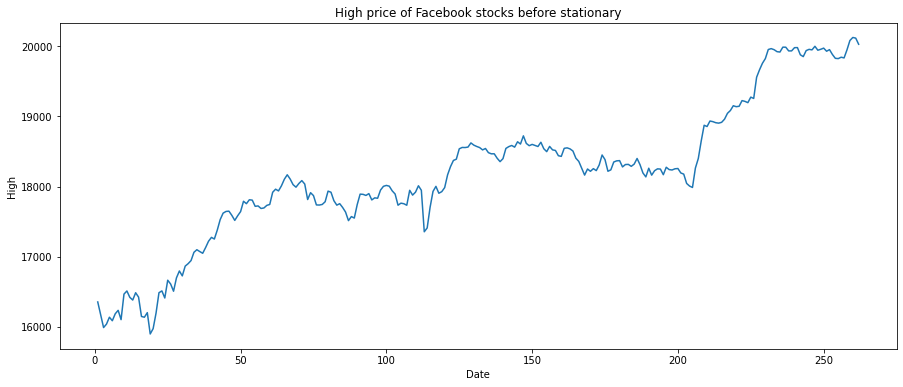

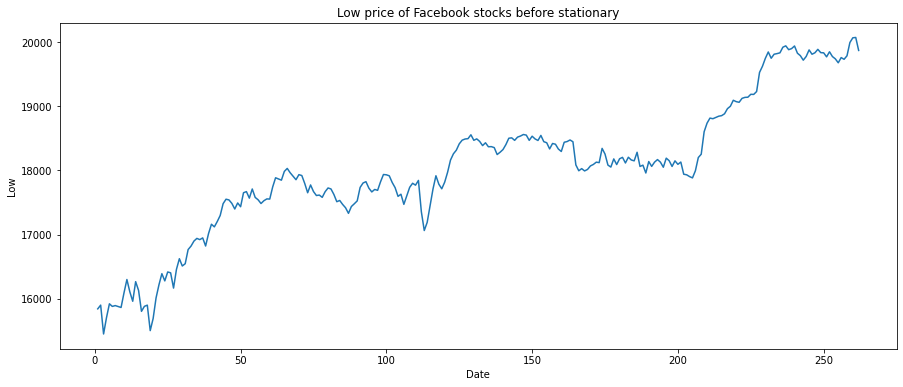

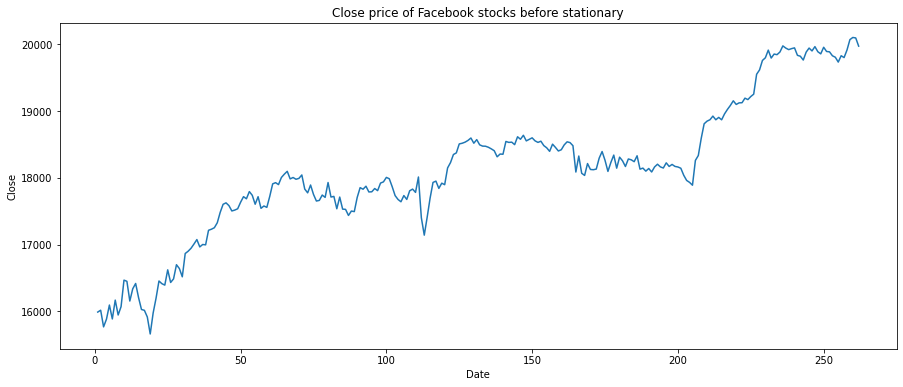

In [ ]:
for c in df[['Open', 'High', 'Low', 'Close']]:
    df[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks before stationary")
    plt.show()

The following loop will plot a histogram and KDE for all the columns before making it stationary:

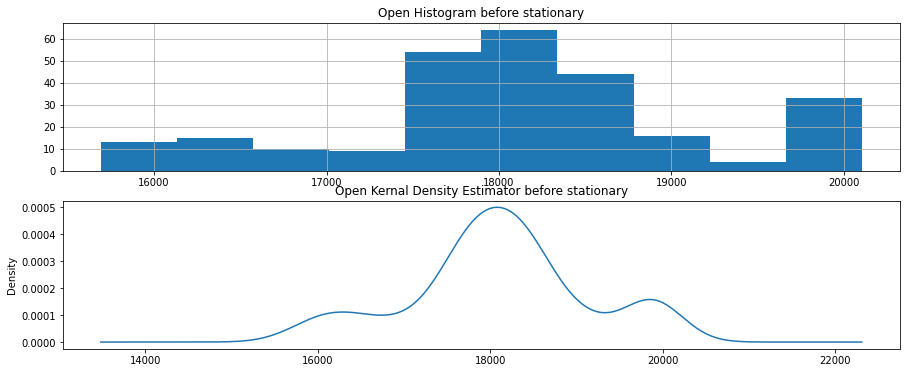

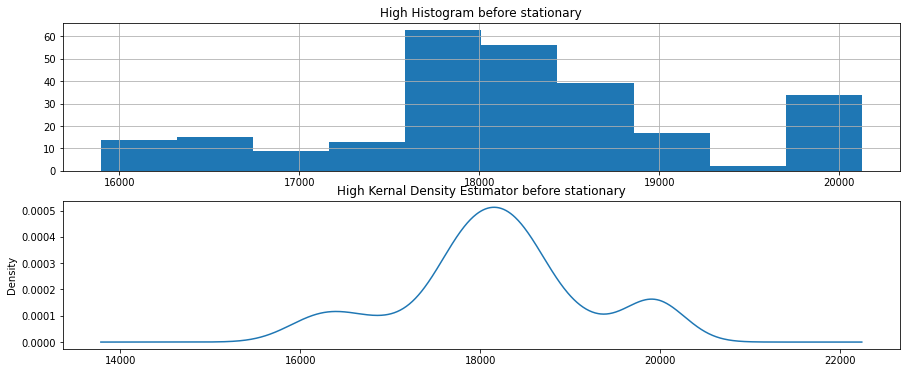

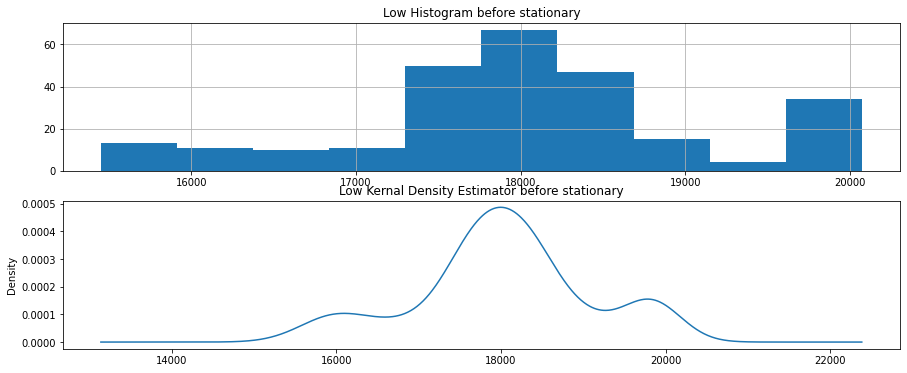

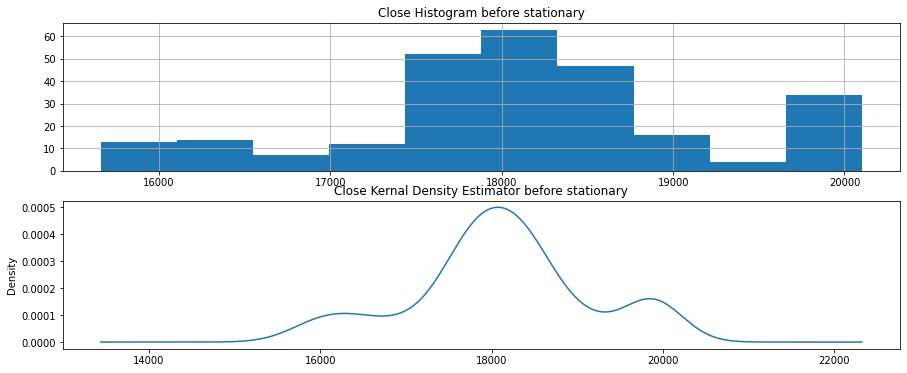

In [ ]:
for c in df[['Open', 'High', 'Low', 'Close']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram before stationary")
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator before stationary")
    plt.show()

Define a time-series evaluation function, as shown below:

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return 

Here is the ADF test function to check for stationary data:

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

Here is how to check whether the variables are stationary:

In [ ]:
for name, column in df[['Open', 'High', 'Low', 'Close']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Open
Test Statistic                  -0.776223
p-value                          0.826007
No Lags Used                     0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                  -1.240162
p-value                          0.656085
No Lags Used                     2.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                  -0.981046
p-value                          0.760114
No L

Make a copy of the data, and let’s perform the test train split.
The train will have all the data except the last 30 days, and the test will contain only the last 30 days to evaluate against the predictions.

In [ ]:
X = df[['Open', 'High', 'Low', 'Close' ]]
train, test = X[0:-30], X[-30:]

Make the data stationary by using Pandas differencing, as shown here:

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

Check whether the variables are stationary after first differencing, as 
shown here:

In [ ]:
for name, column in train_diff[['Open', 'High', 'Low', 'Close' ]].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Open
Test Statistic                -1.579687e+01
p-value                        1.085613e-28
No Lags Used                   0.000000e+00
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                -1.172782e+01
p-value                        1.364178e-21
No Lags Used                   1.000000e+00
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                  -3.997846
p-value                          0.001422


Create the plots after making the data stationary, as shown below:

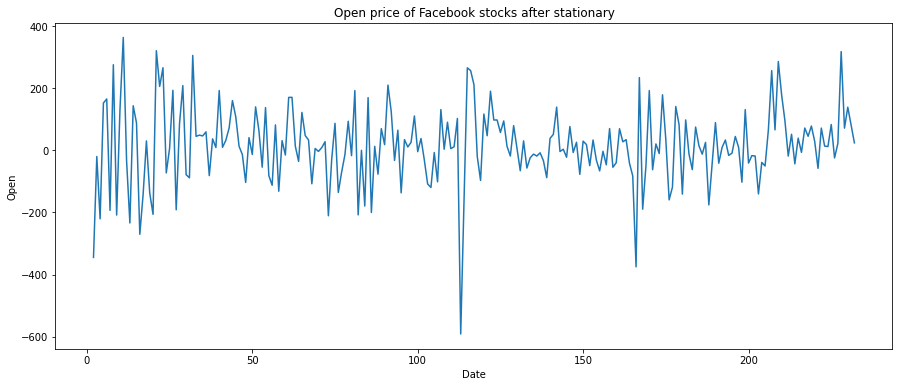

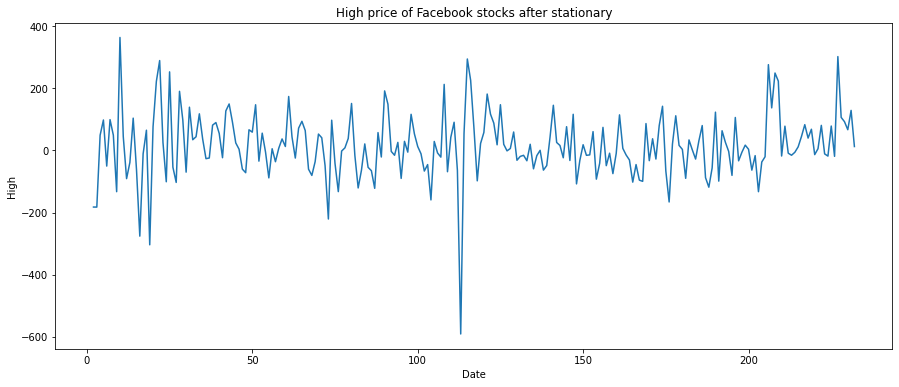

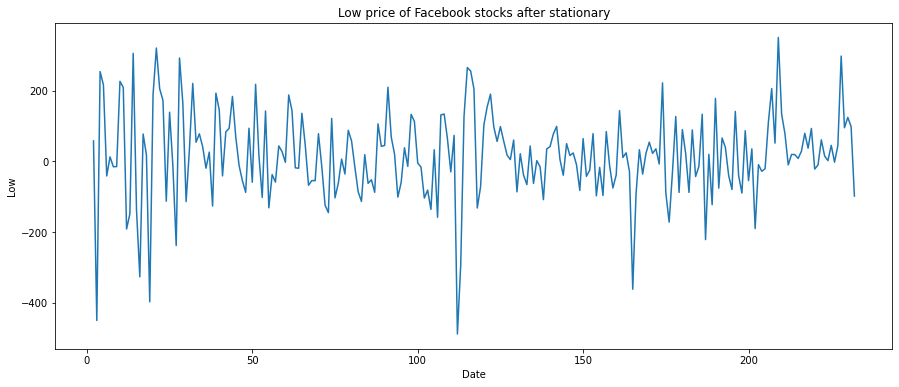

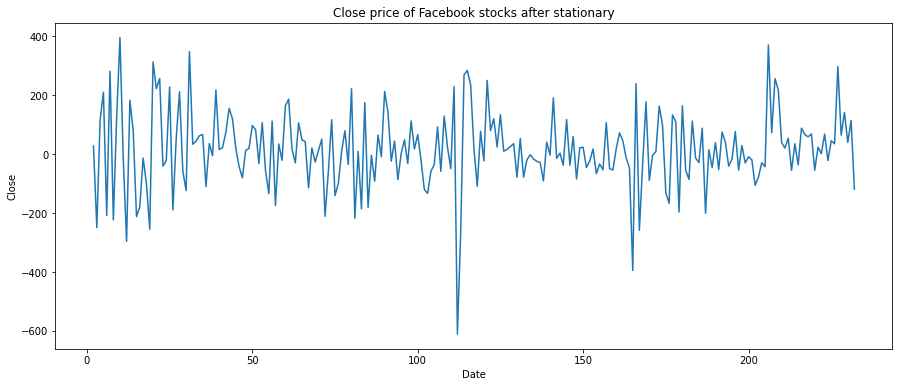

In [ ]:
for c in train_diff[['Open', 'High', 'Low', 'Close']]:
    train_diff[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks after stationary")
    plt.show()

The following loop will plot a histogram and KDE for all the columns 
after making it stationary

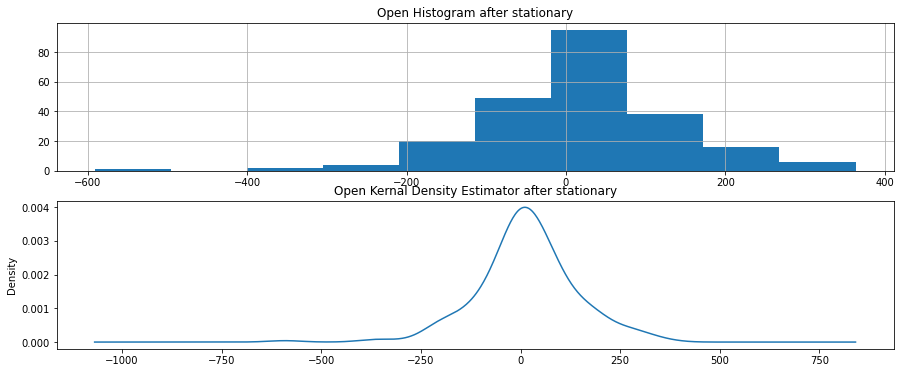

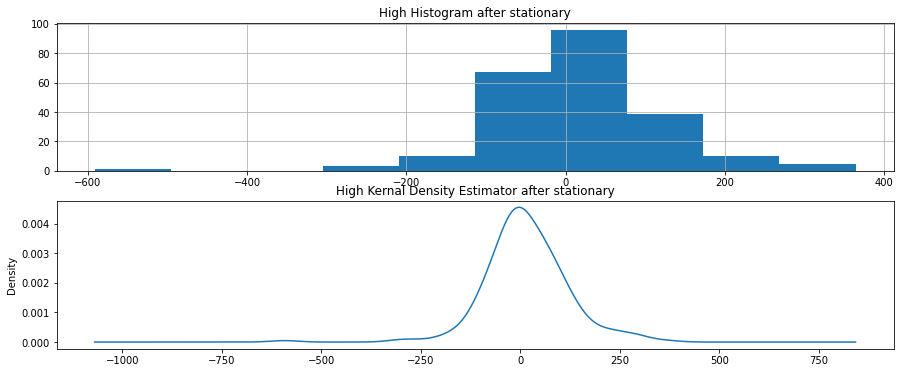

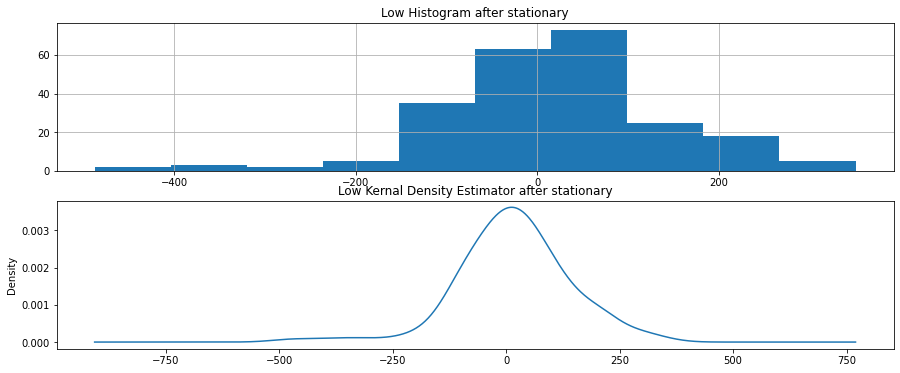

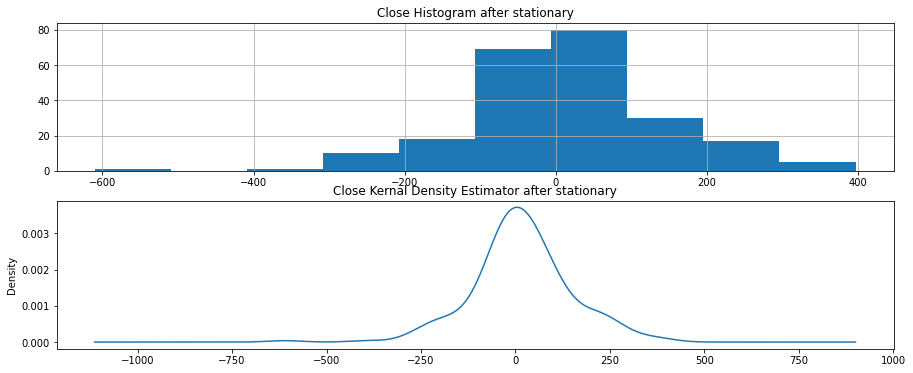

In [ ]:
for c in train_diff[['Open', 'High', 'Low', 'Close']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [ ]:
train_diff.head(10)

,Open,High,Low,Close
2,-344.879883,-182.370117,58.139648,27.939453
3,-20.000000,-182.509766,-449.690430,-249.279297
4,-220.580078,49.139649,254.100586,115.939454
5,152.229492,98.200195,216.439453,210.830078
6,165.360352,-50.330078,-40.949218,-208.290039
7,-193.299805,99.330078,13.009765,282.010742
8,275.580078,49.240234,-14.860351,-222.770508
9,-208.459961,-132.890625,-14.580078,125.179687
10,129.979493,364.161133,226.540039,396.661133
11,363.371093,44.679688,209.209961,-17.121093


A **cointegration test** is the co-movement among underlying variables over the long run. 

**Cointegration analysis** aims to uncover causal relations among variables by determining if the stochastic trends in a group of variables are shared by the series. If these trends are shared, either one variable causes the other or they are both driven by a third variable.

**Two or more variables are cointegrated if and only if they share common trends.**

Correlation is simply a measure of the degree of mutual association between two or more variables.

We can see that the test says that there is the presence of a long-run relationship between features.

**coint_johansen():**

coint_johansen(endog, det_order, k_ar_diff)

**det_order - int**

-1 - no deterministic terms

0 - constant term

1 - linear trend

**k_ar_diffint - nonnegative**

Number of lagged differences in the model.

The second term in the arguments represents the order of null hypothesis. The third term specifies the number of lagged difference terms used when computing the estimator.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5) 
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1 # Trace statistics
    cvts = res.cvt[:, d[str(1-0.05)]] #Critical values (90%, 95%, 99%) for trace statistic.
    def adjust(val, length= 6): 
        return str(val).ljust(length) #string left justified (ljust)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [ ]:
cointegration_test(train_diff[['Open', 'High', 'Low', 'Close']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Open   >  311.57    > 40.1749   =>   True
High   >  201.62    > 24.2761   =>   True
Low    >  102.52    > 12.3212   =>   True
Close  >  32.21     > 4.1296    =>   True


Fit the VAR model for the AR term between 1 to 9 and choose the best AR component, as shown here:

In [ ]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train_diff)
    results = model.fit(i)
    print(f'Order : {i}, AIC:  {results.aic}, BIC: { results.bic}')

Order : 1, AIC:  32.33907657947466, BIC: 32.6380399976419
Order : 2, AIC:  31.80163108090686, BIC: 32.34143017316866
Order : 3, AIC:  31.548769661837945, BIC: 32.33090112107317
Order : 4, AIC:  31.529049396699737, BIC: 32.5550256133902
Order : 5, AIC:  31.5360964823363, BIC: 32.807445774101225
Order : 6, AIC:  31.572569230449282, BIC: 33.09083607587347
Order : 7, AIC:  31.59501471962329, BIC: 33.36175999647679
Order : 8, AIC:  31.634038096896525, BIC: 33.65083932484601
Order : 9, AIC:  31.660078718842314, BIC: 33.92853030675717


To make data stationary, we used Pandas differencing after forecasting 
the results. We need to inverse the result to the original scale. As we don’t 
have a Pandas function for this, let’s define a custom function to inverse 
Pandas differencing.

In [ ]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

Autoregressive AR(4) appears to be providing the least Akaike 
Information Criterion (AIC) and Bayesian Information Criterion (BIC), so 
let’s fit and forecast.

AIC and BIC are two ways of scoring a model based on its log 
likelihood and complexity.

In [ ]:
results = model.fit(4)
display(results.summary())
z = results.forecast(y=train_diff[['Open', 'High', 'Low', 'Close' ]].values, steps=30)
df_pred = pd.DataFrame(z, columns=['Open', 'High', 'Low', 'Close'  ])

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 29, Nov, 2022
Time:                     08:30:09
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    32.5550
Nobs:                     227.000    HQIC:                   31.9430
Log likelihood:          -4798.94    FPE:                4.93606e+13
AIC:                      31.5290    Det(Omega_mle):     3.69764e+13
--------------------------------------------------------------------
Results for equation Open
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            3.203119         2.016085            1.589           0.112
L1.Open         -0.680835         0.102210           -6.661           0.000
L1.High         -0.089930         0.048603           -1.850           0.064
L1.Lo

Arrange an index for aligning plots, as shown below:

In [ ]:
df_pred["new_index"] = range(233, 263)
df_pred = df_pred.set_index("new_index")

In [ ]:
df_pred

,Open,High,Low,Close
new_index,,,,
233,-88.065500,-95.117550,-62.425255,-10.727882
234,-5.772303,-11.205045,15.521340,-13.508886
235,-0.434844,38.496234,31.424223,64.707119
236,51.606931,41.327721,32.770536,14.358589
237,20.084552,15.328065,27.850804,20.123736
238,16.079684,6.367302,4.332415,6.375142
239,9.024404,18.392106,19.340173,28.261694
240,26.551602,23.170814,20.891955,14.004266
241,14.301531,12.392754,13.298405,10.142103


Let’s inverse the differenced prediction, as shown below:

In [ ]:
res = inverse_diff(df[['Open', 'High', 'Low', 'Close' ]],df_pred)

In [ ]:
res

,Open,High,Low,Close,Open_1st_inv_diff,High_1st_inv_diff,Low_1st_inv_diff,Close_1st_inv_diff
new_index,,,,,,,,
233,-88.065500,-95.117550,-62.425255,-10.727882,19940.553641,19933.501591,19807.965370,19960.402977
234,-5.772303,-11.205045,15.521340,-13.508886,19934.781338,19922.296546,19823.486710,19946.894090
235,-0.434844,38.496234,31.424223,64.707119,19934.346494,19960.792781,19854.910933,20011.601209
236,51.606931,41.327721,32.770536,14.358589,19985.953425,20002.120502,19887.681469,20025.959798
237,20.084552,15.328065,27.850804,20.123736,20006.037977,20017.448567,19915.532272,20046.083533
238,16.079684,6.367302,4.332415,6.375142,20022.117662,20023.815869,19919.864688,20052.458675
239,9.024404,18.392106,19.340173,28.261694,20031.142065,20042.207975,19939.204860,20080.720369
240,26.551602,23.170814,20.891955,14.004266,20057.693668,20065.378789,19960.096816,20094.724635
241,14.301531,12.392754,13.298405,10.142103,20071.995199,20077.771543,19973.395221,20104.866738


Evaluate the results individually, as shown below:

In [ ]:
for i in ['Open', 'High', 'Low', 'Close' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for Open
MSE is : 96475.65112756054
MAE is : 272.41117065567283
RMSE is : 310.6052979708501
MAPE is : 1.369727903887651
R2 is : -14.781846912253211

Evaluation metric for High
MSE is : 76165.26004845892
MAE is : 233.3943951082006
RMSE is : 275.9805428802163
MAPE is : 1.1709231240570384
R2 is : -12.68519169812707

Evaluation metric for Low
MSE is : 84415.1948587164
MAE is : 239.85005825950648
RMSE is : 290.5429311800863
MAPE is : 1.2104917099059327
R2 is : -8.885093043822442

Evaluation metric for Close
MSE is : 120535.30355185564
MAE is : 312.7798135745027
RMSE is : 347.18194588983977
MAPE is : 1.5729127244970404
R2 is : -14.91072270418992



Plot the results, as shown below:

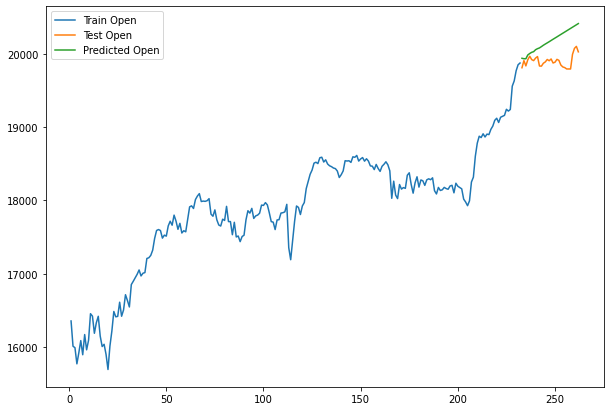

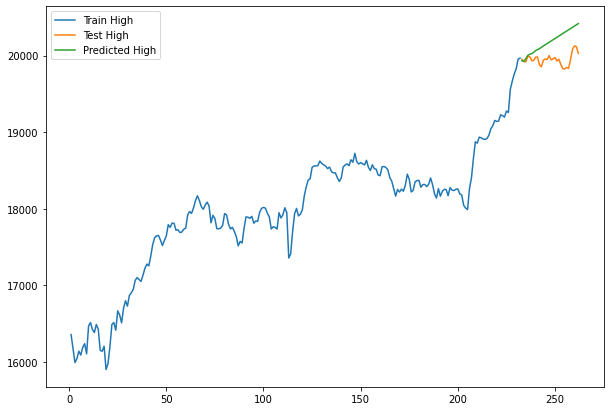

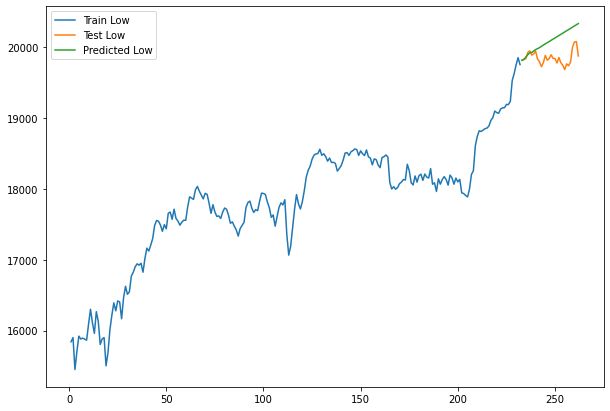

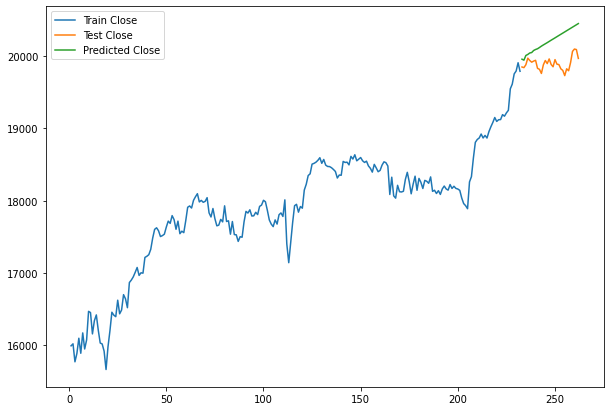

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['Open', 'High', 'Low', 'Close' ]:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

#Dataset 2: FB.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Time Series Analysis/FB.csv', parse_dates= True)
df.head()

,Date,ID,Close,Low,High,Volume,C(t-5),C(t-4),C(t-3),C(t-2),...,CCI200-200,ADO>ADOt-1,HIS,DAX,AORD,N100,N225,SP500,SSE,Closing_Direction
0,2012-07-09,41099,31.730000,31.260000,31.900000,10945600,31.10,30.77,31.20,31.47,...,1,0,0,0,0,0,0,0,0,1
1,2012-07-10,41100,32.169998,31.990000,32.880001,17785200,30.77,31.20,31.47,31.73,...,1,0,0,1,0,1,0,0,0,0
2,2012-07-11,41101,31.469999,31.160000,32.480000,14269500,31.20,31.47,31.73,32.17,...,0,1,1,1,0,0,0,0,1,0
3,2012-07-12,41102,30.969999,30.549999,31.559999,13030300,31.47,31.73,32.17,31.47,...,0,1,0,0,0,0,0,0,1,0
4,2012-07-13,41103,30.809999,30.600000,31.400000,11300700,31.73,32.17,31.47,30.97,...,0,0,1,1,1,1,1,0,1,0


In [ ]:
df.columns

Index(['Date', 'ID', 'Close', 'Low', 'High', 'Volume', 'C(t-5)', 'C(t-4)',
       'C(t-3)', 'C(t-2)', 'C(t-4)>C(t-5)', 'C(t-3)>C(t-4)', 'C(t-2)>C(t-3)',
       'C(t-1)>C(t-2)', 'MA-10', 'MA-5', 'WMA-10', 'SO', 'M', 'SSO', 'EMA',
       'MACD_Sline_9', 'RSI', 'CCI', 'ADO', 'MA-10>C', 'MA-5>C', 'WMA-10>C',
       'SO>SOt-1', 'M>0', 'SSO>SSOt-1', 'EMA>C', 'MACD t-1 > MACD t-2',
       'RSI70-30', 'CCI200-200', 'ADO>ADOt-1', 'HIS', 'DAX', 'AORD', 'N100',
       'N225', 'SP500', 'SSE', 'Closing_Direction'],
      dtype='object')

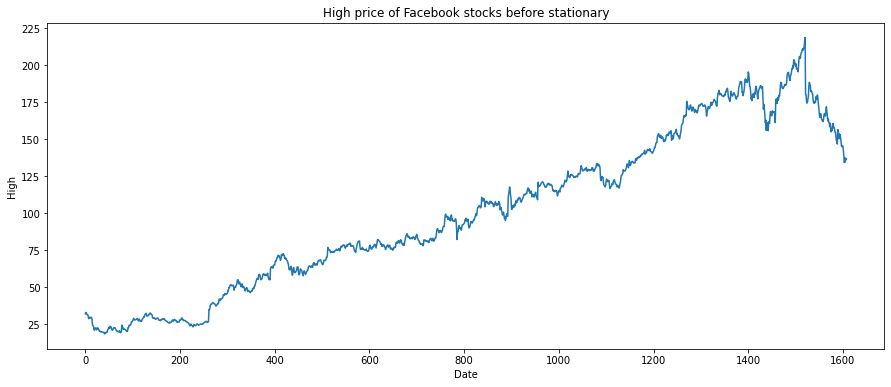

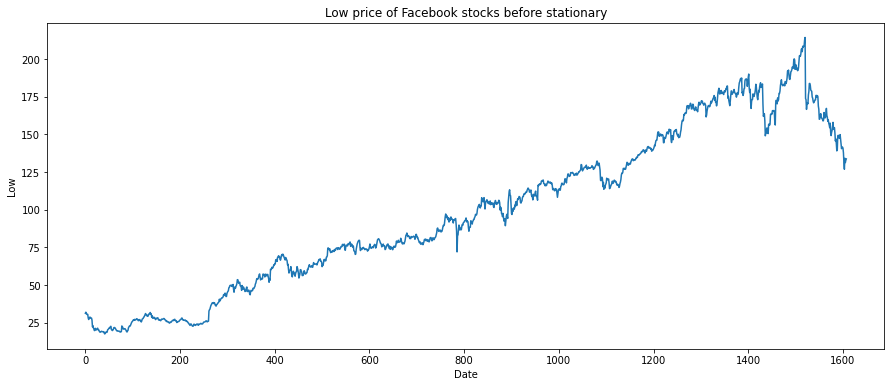

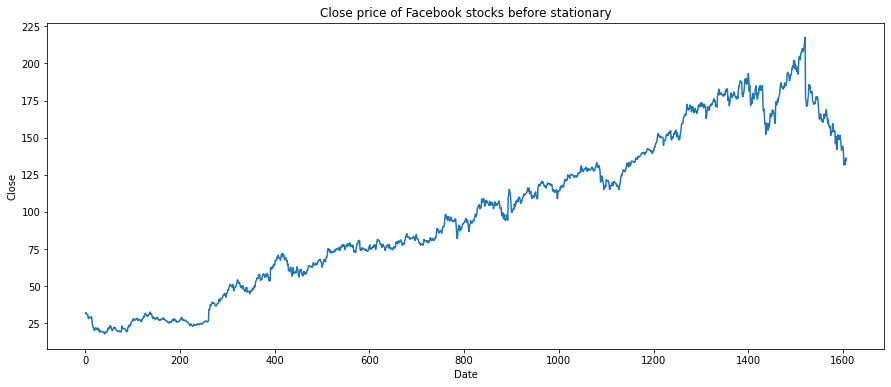

In [ ]:
for c in df[[ 'High', 'Low', 'Close']]:
    df[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks before stationary")
    plt.show()

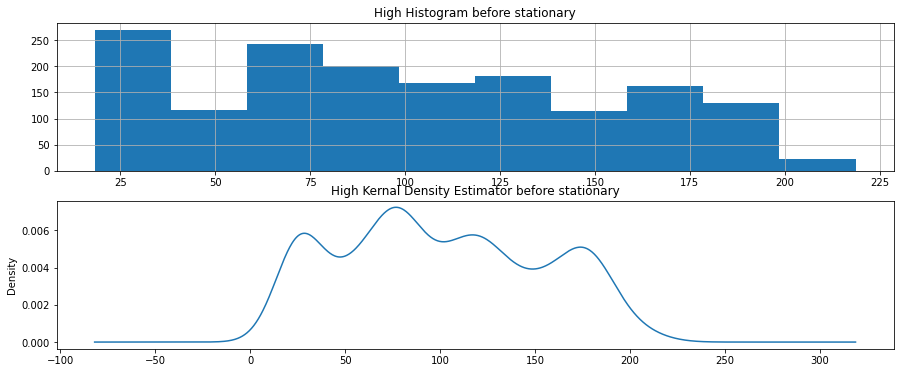

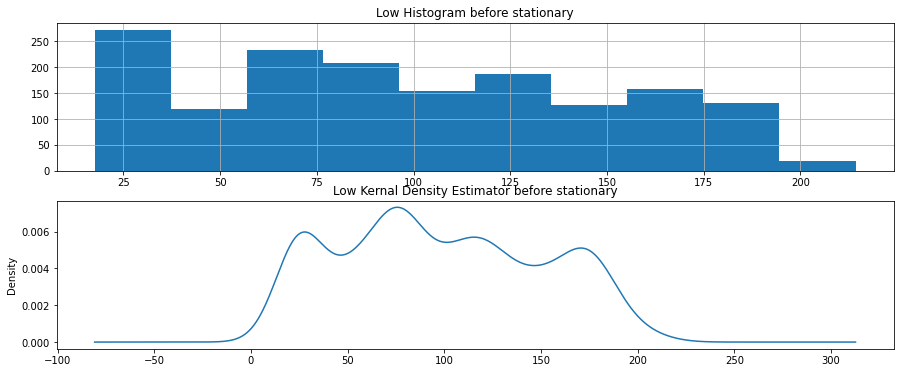

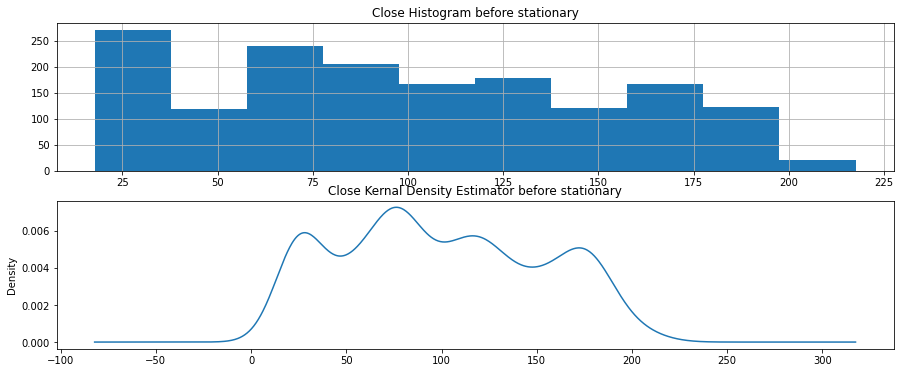

In [ ]:
for c in df[['High', 'Low', 'Close']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram before stationary")
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator before stationary")
    plt.show()

In [ ]:
for name, column in df[['High', 'Low', 'Close']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: High
Test Statistic                   -1.145944
p-value                           0.696407
No Lags Used                      1.000000
Number of Observations Used    1606.000000
Critical Value (1%)              -3.434428
Critical Value (5%)              -2.863341
Critical Value (10%)             -2.567729
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                   -1.169352
p-value                           0.686639
No Lags Used                      8.000000
Number of Observations Used    1599.000000
Critical Value (1%)              -3.434446
Critical Value (5%)              -2.863349
Critical Value (10%)             -2.567733
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.159171
p-value                       

In [ ]:
X = df[['High', 'Low', 'Close' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
for name, column in train_diff[['High', 'Low', 'Close' ]].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: High
Test Statistic                  -37.660317
p-value                           0.000000
No Lags Used                      0.000000
Number of Observations Used    1576.000000
Critical Value (1%)              -3.434506
Critical Value (5%)              -2.863376
Critical Value (10%)             -2.567747
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                -1.496751e+01
p-value                        1.213829e-27
No Lags Used                   9.000000e+00
Number of Observations Used    1.567000e+03
Critical Value (1%)           -3.434530e+00
Critical Value (5%)           -2.863386e+00
Critical Value (10%)          -2.567753e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Close
Test Statistic                  -19.731454
p-value                           0.000000
No L

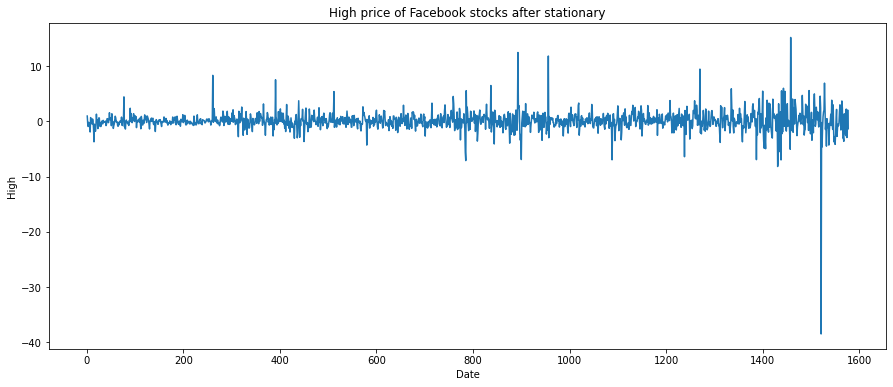

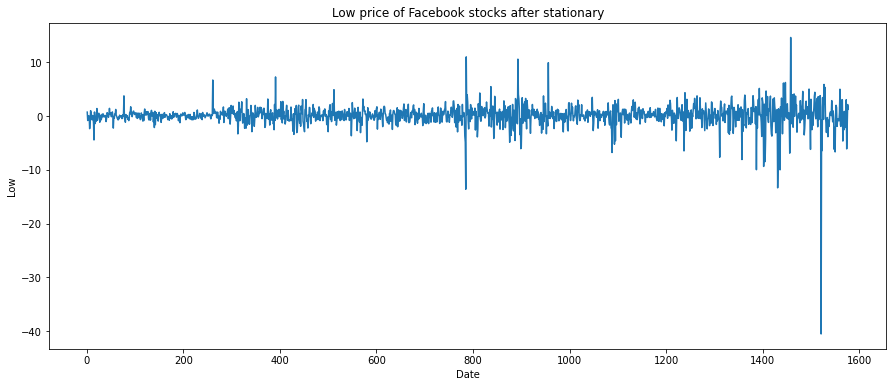

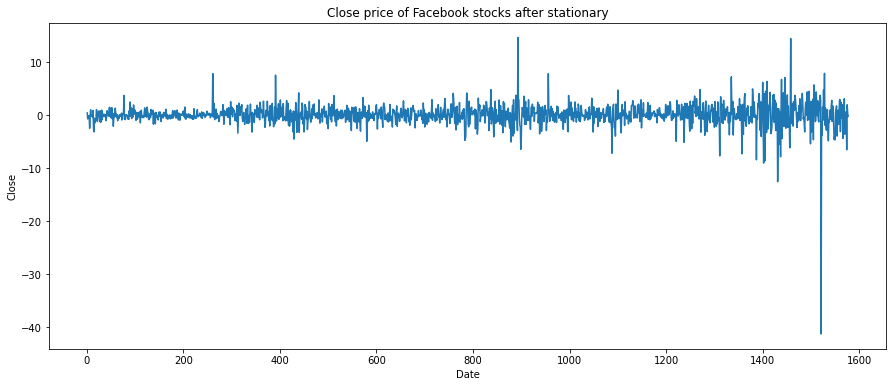

In [ ]:
for c in train_diff[['High', 'Low', 'Close']]:
    train_diff[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks after stationary")
    plt.show()

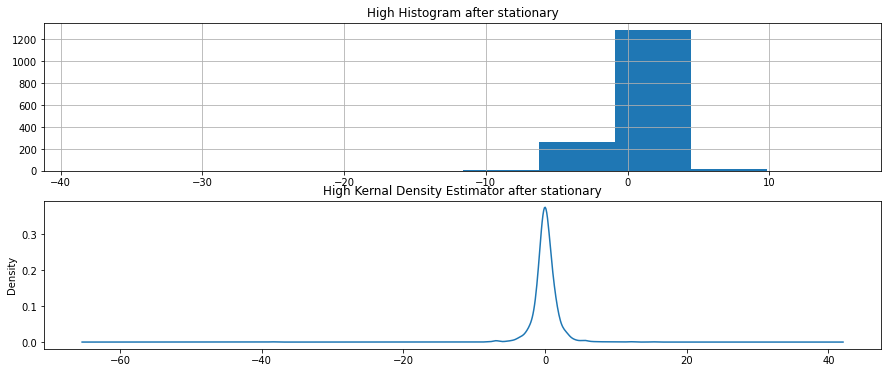

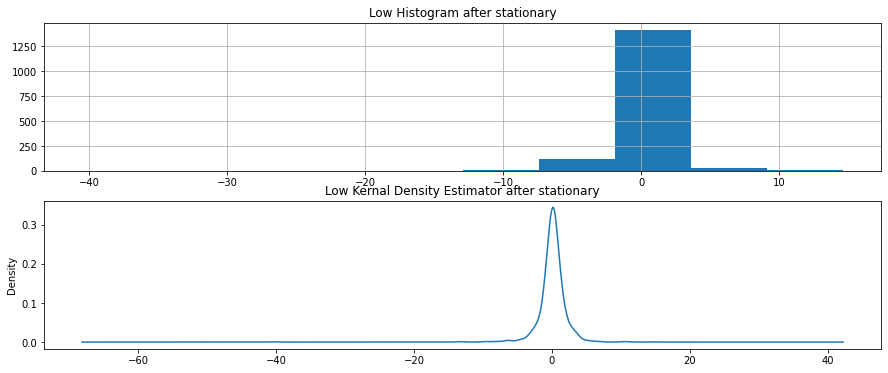

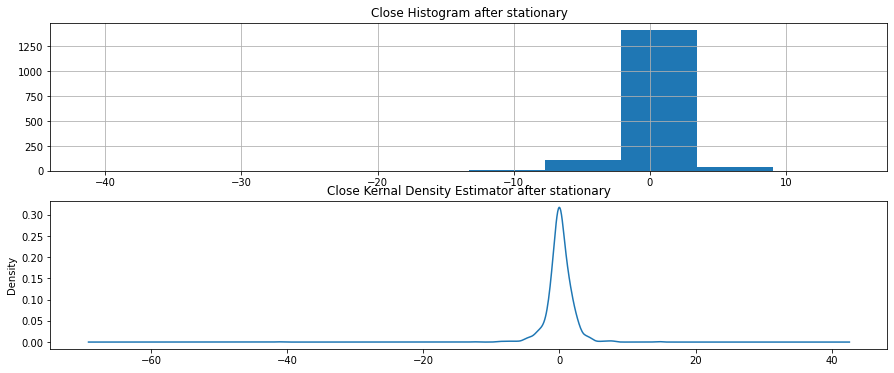

In [ ]:
for c in train_diff[['High', 'Low', 'Close']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [ ]:
train_diff.head(10)

,High,Low,Close
1,0.980001,0.730000,0.439998
2,-0.400001,-0.830000,-0.699999
3,-0.920001,-0.610001,-0.500000
4,-0.159999,0.050001,-0.160000
5,-0.330000,-0.040001,-0.090000
6,-0.570000,-2.350000,-2.469999
7,-1.910000,-1.059999,-0.160000
8,0.700001,1.000000,1.020001
9,0.209999,0.479999,-0.110001
10,-0.030001,0.090000,-0.240000


In [ ]:
cointegration_test(train_diff[['High', 'Low', 'Close']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
High   >  1466.68   > 24.2761   =>   True
Low    >  737.42    > 12.3212   =>   True
Close  >  274.39    > 4.1296    =>   True


In [ ]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train_diff)
    results = model.fit(i)
    print(f'Order : {i}, AIC:  {results.aic}, BIC: { results.bic}')

Order : 1, AIC:  1.3043433603540755, BIC: 1.34517568474812
Order : 2, AIC:  0.9990101734742474, BIC: 1.0705036474910439
Order : 3, AIC:  0.864635540940478, BIC: 0.9668218578841377
Order : 4, AIC:  0.8289265174886904, BIC: 0.9618374241760856
Order : 5, AIC:  0.7451180531747708, BIC: 0.9087853500599357
Order : 6, AIC:  0.7131399962800404, BIC: 0.9075955375789395
Order : 7, AIC:  0.6879803658605814, BIC: 0.9132560596762473
Order : 8, AIC:  0.6879261751207371, BIC: 0.9440539835687787
Order : 9, AIC:  0.6419263051179332, BIC: 0.9289382444524166


In [ ]:
results = model.fit(9)
display(results.summary())
z = results.forecast(y=train_diff[['High', 'Low', 'Close' ]].values, steps=30)
df_pred = pd.DataFrame(z, columns=['High', 'Low', 'Close'  ])

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 29, Nov, 2022
Time:                     08:30:21
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.928938
Nobs:                     1568.00    HQIC:                  0.748611
Log likelihood:          -7093.96    FPE:                    1.90016
AIC:                     0.641926    Det(Omega_mle):         1.80190
--------------------------------------------------------------------
Results for equation High
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.091566         0.043043            2.127           0.033
L1.High         -0.817879         0.056989          -14.351           0.000
L1.Low           0.017466         0.051354            0.340           0.734
L1.Cl

In [ ]:
df_pred["new_index"] = range(1500, 1608)
df_pred = df_pred.set_index("new_index")
df_pred

ValueError: ignored

In [ ]:
res = inverse_diff(df[['High', 'Low', 'Close' ]],df_pred)
res

,High,Low,Close,High_1st_inv_diff,Low_1st_inv_diff,Close_1st_inv_diff
new_index,,,,,,
1578,0.898167,-0.579846,0.171246,137.508168,133.130161,135.171246
1579,-0.381847,-0.418928,0.413445,137.126321,132.711233,135.584690
1580,0.777691,1.251260,0.309473,137.904012,133.962493,135.894163
1581,0.309505,0.394513,0.379738,138.213517,134.357006,136.273901
1582,0.376882,0.052974,0.093560,138.590399,134.409981,136.367461
1583,-0.239768,-0.053497,0.013596,138.350631,134.356484,136.381058
1584,0.811990,0.546427,0.572615,139.162621,134.902911,136.953672
1585,-0.262378,-0.320306,0.036866,138.900243,134.582605,136.990539
1586,0.333849,0.347697,0.033327,139.234092,134.930302,137.023866


In [ ]:
for i in ['High', 'Low', 'Close' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for High
MSE is : 155.80163465930087
MAE is : 10.831503944768281
RMSE is : 12.482052501864462
MAPE is : 7.114039827881194
R2 is : -1.6298772671830708

Evaluation metric for Low
MSE is : 151.119459574477
MAE is : 10.534676420195789
RMSE is : 12.293065507613509
MAPE is : 7.13382722494852
R2 is : -1.421066043041273

Evaluation metric for Close
MSE is : 148.31763267957038
MAE is : 10.501070339833412
RMSE is : 12.178572686467424
MAPE is : 7.016717733148707
R2 is : -1.4209556262768737



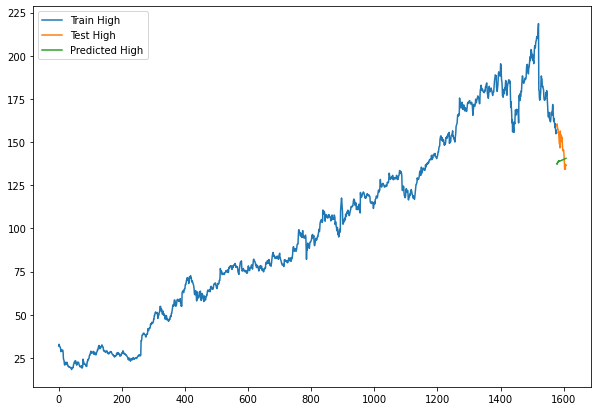

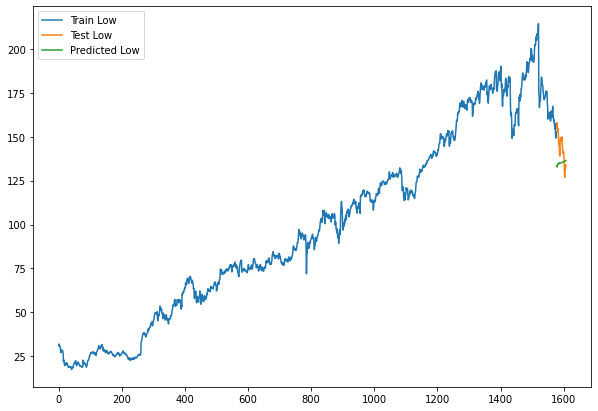

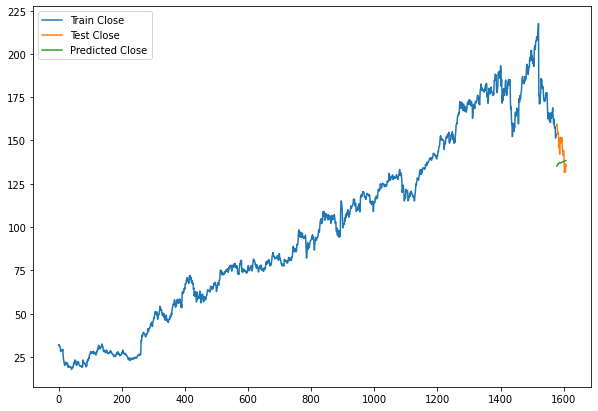

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['High', 'Low', 'Close' ]:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()